# 计算股票之前相关性的program
美股直接输入股票代码如GOOG   
港股输入代码+对应股市，如腾讯：0700.hk   
国内股票需要区分上证和深证，股票代码后面加.ss或者.sz  
请输入你要查询的股票代码：  

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stock_list = ['601021.ss', '600115.ss', '601111.ss', '600029.ss', '603885.ss', '002928.sz']

start_date=input("please enter the start date(e.g. 2019-01-01):")
end_date=input("please enter the end date(e.g. 2019-01-01):")
interval=input("请输入间隔eg-d,m,y:")


close_data = pd.DataFrame()

for stock in stock_list:
    close_data[stock] = wb.get_data_yahoo(stock, start=start_date, end=end_date, interval=interval)['Adj Close']
    
close_data.head()


please enter the start date(e.g. 2019-01-01):2015-01-01
please enter the end date(e.g. 2019-01-01):2019-12-31
请输入间隔eg-d,m,y:d


,601021.ss,600115.ss,601111.ss,600029.ss,603885.ss,002928.sz
Date,,,,,,
2015-01-21,12.786552,5.088771,7.784003,4.990074,NaN,NaN
2015-01-22,14.067652,5.127841,7.698881,4.980533,NaN,NaN
2015-01-23,15.475883,5.166910,7.812377,5.018699,NaN,NaN
2015-01-26,17.025915,5.430627,8.086662,5.152275,NaN,NaN
2015-01-27,18.727530,5.313419,7.821836,5.028239,NaN,NaN


           601021.ss  600115.ss  601111.ss  600029.ss  603885.ss  002928.sz
601021.ss   1.000000   0.460299   0.474204   0.486453   0.551999   0.473328
600115.ss   0.460299   1.000000   0.794560   0.877801   0.561383   0.565506
601111.ss   0.474204   0.794560   1.000000   0.829619   0.528196   0.542060
600029.ss   0.486453   0.877801   0.829619   1.000000   0.562189   0.574225
603885.ss   0.551999   0.561383   0.528196   0.562189   1.000000   0.535248
002928.sz   0.473328   0.565506   0.542060   0.574225   0.535248   1.000000


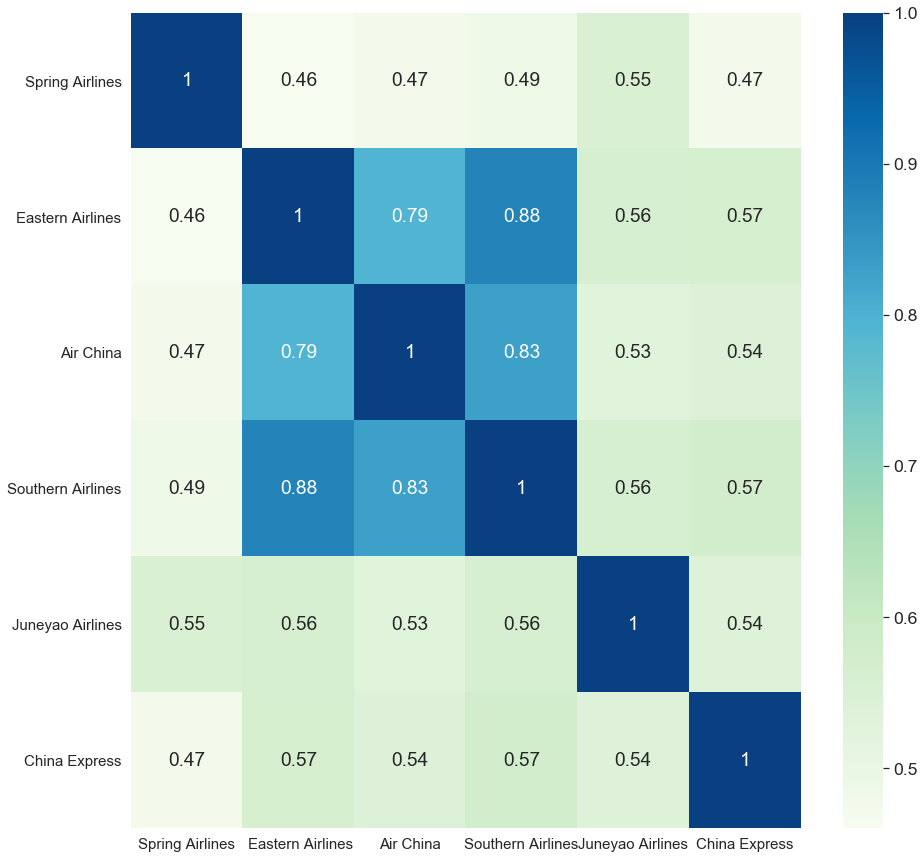

In [5]:
return_data = np.log(close_data/close_data.shift(1))
print(return_data.corr())
xticks = ['Spring Airlines',' Eastern Airlines','Air China','Southern Airlines','Juneyao Airlines','China Express']
yticks = ['Spring Airlines',' Eastern Airlines','Air China','Southern Airlines','Juneyao Airlines','China Express']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)
sns_heatmap=sns.heatmap(return_data.corr(),annot=True,cmap='GnBu')
ax.set_xticklabels(xticks, rotation=0, fontsize=15)
ax.set_yticklabels(yticks, rotation=0, fontsize=15)
sns.set(font_scale=2)